In [161]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import common

In [162]:
base_dirs = [
    Path("../data_out/finn_different_loss_patterns"),
    Path("../data_out/finn_different_seeds_epochs_100"),
    Path("../data_out/finn_running_intervals_stepsize_30_epochs_100"),
    # Path("../data_out/finn_different_seeds_epochs_1000"),
]

df = {
    "finn_dir": [],
    "ret_file_path": [],
    "retardation_file_paths": [],
    "epochs": [],
    "label": [],
    "group": [],
}

ret_freundlich = np.load("../data_out/default_finn/retardation_freundlich.npy")

def is_ret_OK(ret):
    return np.mean(np.square(ret - ret_freundlich)) < 0.8

for base_dir in base_dirs:
    for finn_dir, ret_file_path in common.iter_final_retardation_files(base_dir, is_ret_OK=is_ret_OK, verbose=True):
        df["finn_dir"].append(finn_dir)
        df["ret_file_path"].append(ret_file_path)
        df["retardation_file_paths"].append(ret_file_path)  # needed for backwards compatibility
        
        epochs = 1000 if "epochs_1000" in str(finn_dir) else 100
        
        if "different_seeds" in str(finn_dir):
            label = finn_dir.parts[-1]
        else:
            label = str(finn_dir.relative_to(base_dir))

        group = base_dir.parts[-1]
        
        df["epochs"].append(epochs)
        df["label"].append(label)
        df["group"].append(group)

df = pd.DataFrame(df)
df.to_csv("../data_out/different_seeds_ret_files.csv")
display(df.head())
display(len(df))

Skipped ../data_out/finn_different_loss_patterns/79167585 because ret contains infs
Skipped ../data_out/finn_different_seeds_epochs_100/97729629 because epoch < 100
Skipped ../data_out/finn_different_seeds_epochs_100/6995700 because epoch < 100
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_5 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_10 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_11 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_8 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_6 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_7 because ret is not OK
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_0 because epoch < 100
Skipped ../data_out/finn_running_intervals_stepsize_30_epochs_100/c_9 because ret is not OK
Skipped ../data_out

,finn_dir,ret_file_path,retardation_file_paths,epochs,label,group
0,../data_out/finn_different_loss_patterns/61979146,../data_out/finn_different_loss_patterns/61979...,../data_out/finn_different_loss_patterns/61979...,100,61979146,finn_different_loss_patterns
1,../data_out/finn_different_loss_patterns/63811110,../data_out/finn_different_loss_patterns/63811...,../data_out/finn_different_loss_patterns/63811...,100,63811110,finn_different_loss_patterns
2,../data_out/finn_different_loss_patterns/67702118,../data_out/finn_different_loss_patterns/67702...,../data_out/finn_different_loss_patterns/67702...,100,67702118,finn_different_loss_patterns
3,../data_out/finn_different_loss_patterns/51280232,../data_out/finn_different_loss_patterns/51280...,../data_out/finn_different_loss_patterns/51280...,100,51280232,finn_different_loss_patterns
4,../data_out/finn_different_loss_patterns/83483504,../data_out/finn_different_loss_patterns/83483...,../data_out/finn_different_loss_patterns/83483...,100,83483504,finn_different_loss_patterns


33

In [163]:
df2 = df.copy()
df2["ret"] = df["ret_file_path"].apply(lambda p: np.load(p).ravel())
df2 = df2.explode("ret").reset_index(drop=True)
df2["u"] = np.tile(np.arange(0, 100), len(df))

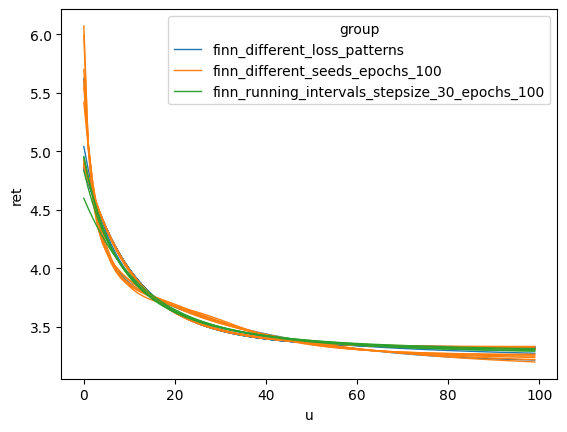

In [164]:
g = sns.lineplot(
    data=df2,
    # kind="line",
    x="u",
    y="ret",
    hue="group",
    units="label",
    estimator=None,
    lw=1,
)

plt.show()

finn_different_seeds_epochs_100


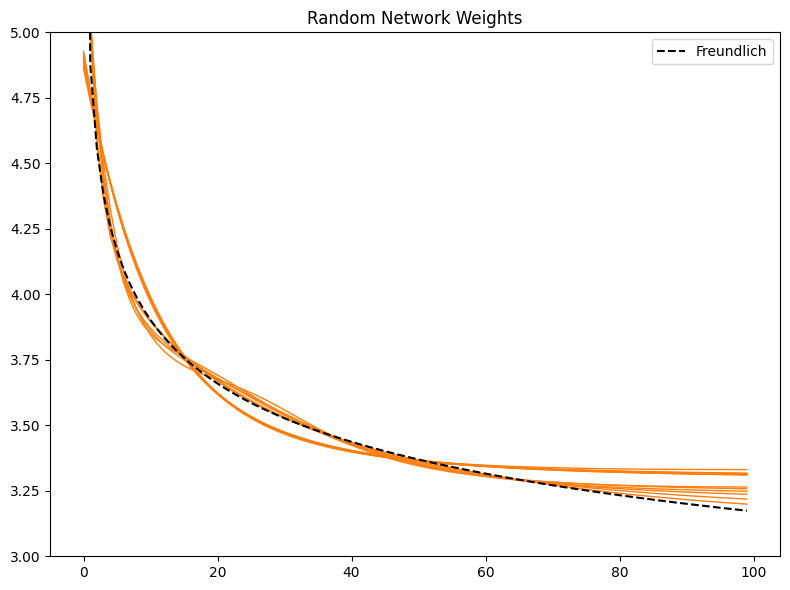

In [165]:
u_ret = np.load(base_dirs[0].parent/"default_finn" / "u_ret.npy")
ret_freundlich = np.load(base_dirs[0].parent/"default_finn" / "retardation_freundlich.npy")

plt.figure(figsize=(8,6))
for i, (group, group_df) in enumerate(df.groupby("group")):
    if not "seed" in group:
        continue
    all_rets = np.array([np.load(p).ravel() for p in group_df["ret_file_path"]])
    plt.plot(all_rets.T, "-", lw=1, color=f"C{i}")#, alpha=0.3)
    print(group)
    plt.title("Random Network Weights")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.tight_layout()
plt.savefig("../data_out/images/rets_randweights.png")

plt.show()

finn_different_loss_patterns


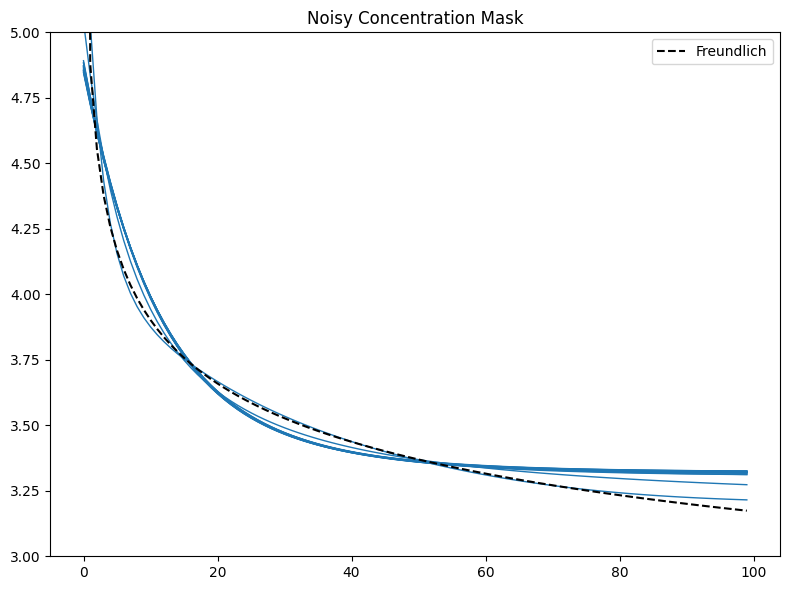

In [166]:
u_ret = np.load(base_dirs[0].parent/"default_finn" / "u_ret.npy")
plt.figure(figsize=(8,6))
for i, (group, group_df) in enumerate(df.groupby("group")):
    if not "pattern" in group:
        continue
    print(group)
    all_rets = np.array([np.load(p).ravel() for p in group_df["ret_file_path"]])
    plt.plot(all_rets.T, "-", lw=1, color=f"C{i}")#, alpha=0.3)
    plt.title("Noisy Concentration Mask")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.tight_layout()
plt.savefig("../data_out/images/rets_cmask.png")

plt.show()

finn_running_intervals_stepsize_30_epochs_100


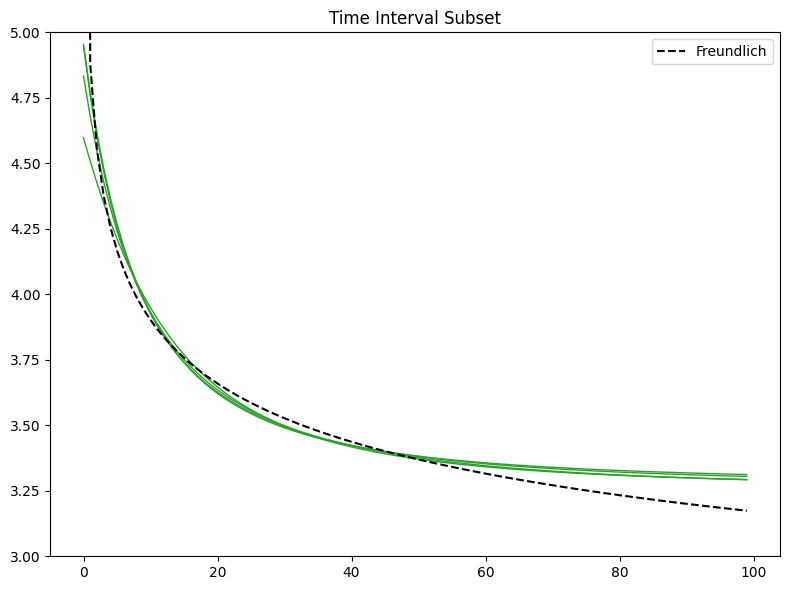

In [167]:
u_ret = np.load(base_dirs[0].parent/"default_finn" / "u_ret.npy")
plt.figure(figsize=(8,6))
for i, (group, group_df) in enumerate(df.groupby("group")):
    if not "interval" in group:
        continue
    print(group)
    all_rets = np.array([np.load(p).ravel() for p in group_df["ret_file_path"]])
    plt.plot(all_rets.T, "-", lw=1, color=f"C{i}")#, alpha=0.3)
    plt.title("Time Interval Subset")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.tight_layout()
plt.savefig("../data_out/images/rets_intervals.png")

plt.show()

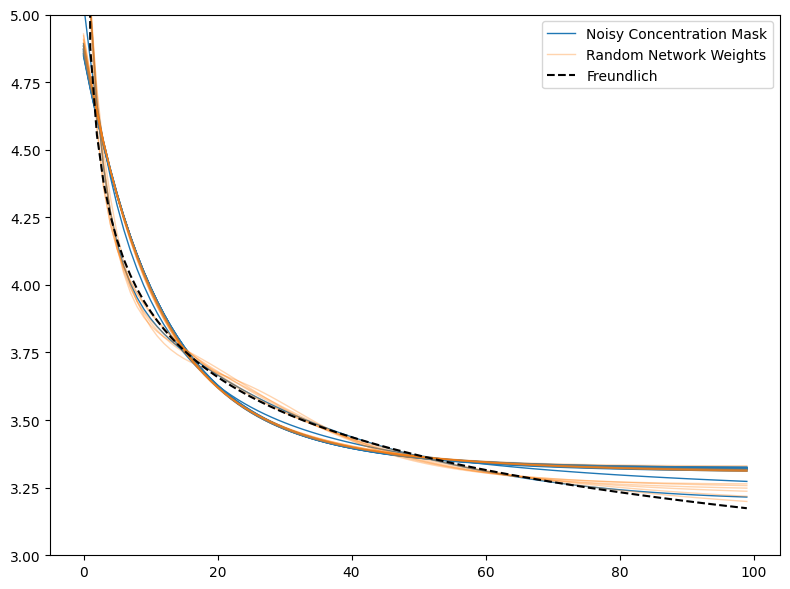

In [168]:
u_ret = np.load(base_dirs[0].parent/"default_finn" / "u_ret.npy")
plt.figure(figsize=(8,6))
for i, (group, group_df) in enumerate(df.groupby("group")):
    if "interval" in group:
        continue
    all_rets = np.array([np.load(p).ravel() for p in group_df["ret_file_path"]])
    for k, ret in enumerate(all_rets):
        plt.plot(ret, "-", lw=1, color=f"C{i}", alpha=1.0/(2*i+1), label=("Noisy Concentration Mask" if "pattern" in group else "Random Network Weights") if k == 0 else "")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.legend()
plt.tight_layout()
plt.savefig("../data_out/images/rets_cmask_randweights.png")
plt.show()

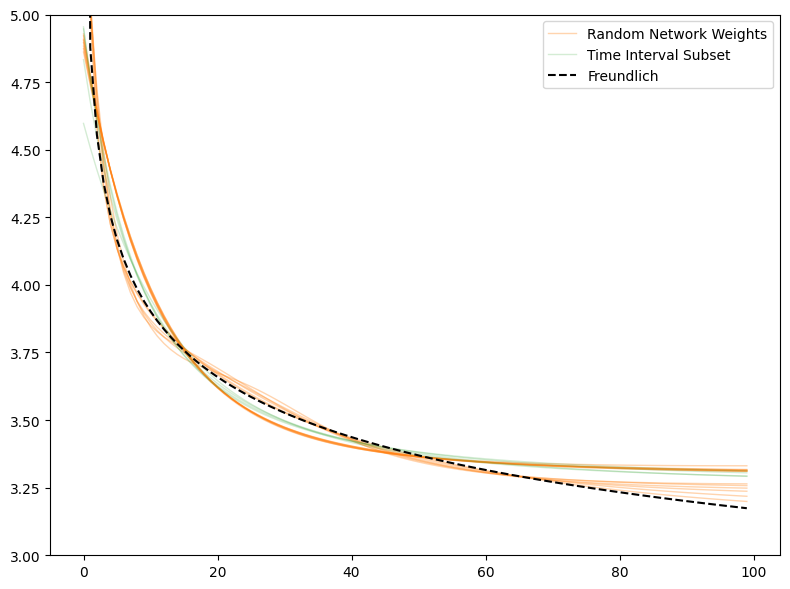

In [171]:
u_ret = np.load(base_dirs[0].parent/"default_finn" / "u_ret.npy")
plt.figure(figsize=(8,6))
for i, (group, group_df) in enumerate(df.groupby("group")):
    if "pattern" in group:
        continue
    all_rets = np.array([np.load(p).ravel() for p in group_df["ret_file_path"]])
    for k, ret in enumerate(all_rets):
        plt.plot(ret, "-", lw=1, color=f"C{i}", alpha=1.0/(2*i+1), label=("Time Interval Subset" if "interval" in group else "Random Network Weights") if k == 0 else "")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.legend()
plt.tight_layout()
plt.savefig("../data_out/images/rets_intervals_randweights.png")
plt.show()

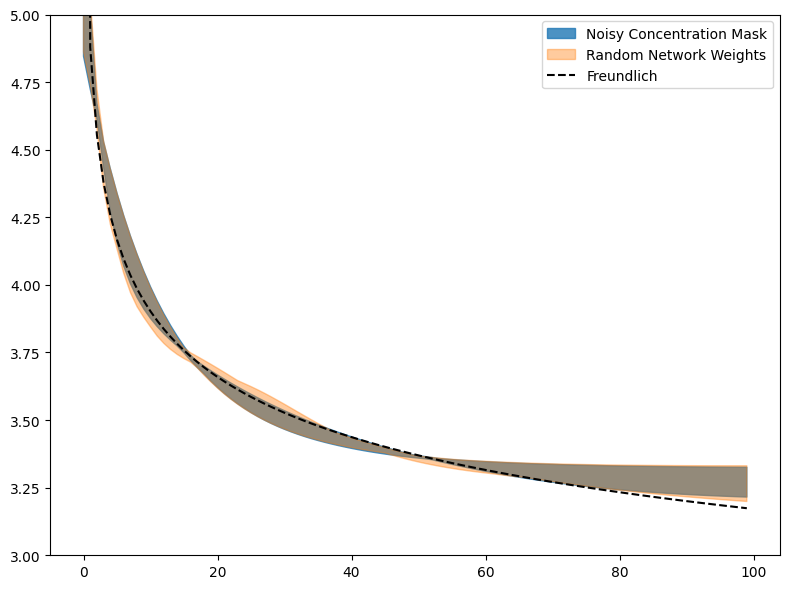

In [169]:
plt.figure(figsize=(8,6))

for i, (group, group_df) in enumerate(df2.groupby("group")):
    if "interval" in group:
        continue
    all_rets = np.array([np.load(p) for p in group_df["ret_file_path"]])
    envelope_curve_up = np.max(all_rets, axis=0).ravel()
    envelope_curve_down = np.min(all_rets, axis=0).ravel()

    plt.fill_between(x=np.arange(envelope_curve_up.shape[0]), y1=envelope_curve_down, y2=envelope_curve_up, alpha=0.8/(i+1), color=f"C{i}", label="Noisy Concentration Mask" if "pattern" in group else "Random Network Weights")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.legend()
plt.tight_layout()
plt.savefig("../data_out/images/envelope_cmask_randweights.png")
plt.show()

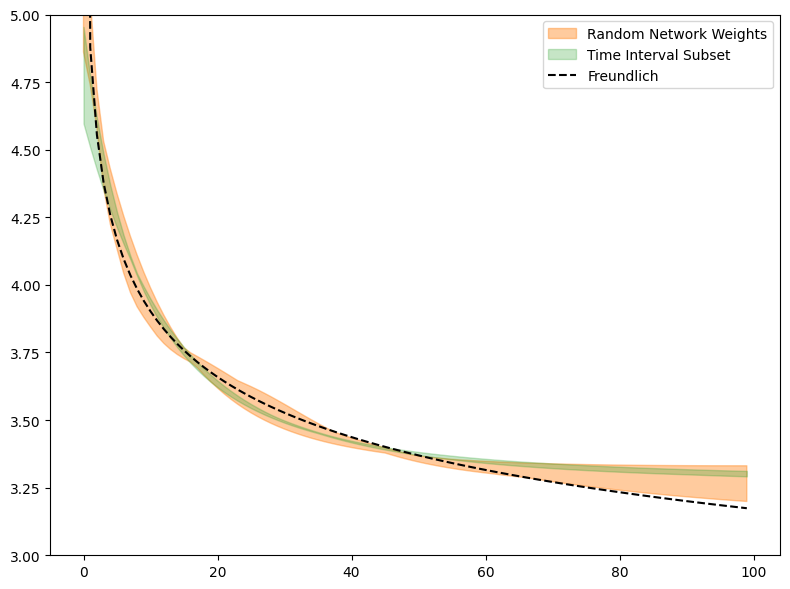

In [170]:
plt.figure(figsize=(8,6))

for i, (group, group_df) in enumerate(df2.groupby("group")):
    if "pattern" in group:
        continue
    all_rets = np.array([np.load(p) for p in group_df["ret_file_path"]])
    envelope_curve_up = np.max(all_rets, axis=0).ravel()
    envelope_curve_down = np.min(all_rets, axis=0).ravel()

    plt.fill_between(x=np.arange(envelope_curve_up.shape[0]), y1=envelope_curve_down, y2=envelope_curve_up, alpha=0.8/(i+1), color=f"C{i}", label="Time Interval Subset" if "interval" in group else "Random Network Weights")

plt.plot(ret_freundlich, "k--", label="Freundlich")
plt.ylim(3, 5)
plt.legend()

plt.legend()
plt.tight_layout()
plt.savefig("../data_out/images/envelope_intervals_randweights.png")
plt.show()